<a href="https://colab.research.google.com/github/alvarosamp/ML_TO_GEOSCIENCE/blob/main/DataImputationMethods%20(aula%205).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imputation in statistics refers to the procedure of using alternative values ​​in place of missing data.
Missing information can introduce a significant degree of bias, make data processing and analysis more difficult, and reduce efficiency, which are the three main problems it causes.
Imputation of missing data is a crucial step in time series analysis to avoid losing information and introducing bias. However, imputation can also introduce uncertainty and error into the data, so it is essential to choose the appropriate method for the data and the goals of the analysis.

There are three types of missing data;

- MCAR (Missing Completely at Random): This is a case where the probability of missing values ​​in a variable is the same for all samples. For example, respondents in the data collection process decide whether to include house numbers in a survey completely randomly. Here, all missing values ​​are the result of random chance. This is a rare situation.

- MAR (Missing at Random): This is a case where the variable has missing values ​​that are randomly distributed, however, they are related to some values ​​of other variables. For example, if men are more likely to hide their income level, income is MAR. The absence of income data depends on the gender of the respondent.

- MNAR (Missing not at Random): This is a case where the missing data is related to events or factors that are not measured by the researcher. For example, people with high income levels are less likely to answer the question about their income level due to fear of higher taxes. Here, the absence of income data is not random, it is related to the income level, but the income level is not known to us.

While missing values ​​often have a negative connotation in machine learning and analytics, they are not always harmful. In fact, with proper management, these missing values ​​can be turned into valuable features, generating additional insights and improving the predictive capabilities of machine learning models. The ability to deal with missing data typically depends on two key pieces of information: the reason behind the missing values ​​and the most effective method for managing them.

## Tratativas de tratamento de dados ausentes em time series

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
path = '/content/drive/MyDrive/Geoscience/Pontos_LST/LST_cana.csv'
data = pd.read_csv(path)

In [22]:
data = data[data['unique_id'] == 0].copy()

In [23]:
data

,Unnamed: 0,longitude,latitude,LST_Day_1km,datetime,unique_id
0,7,-50.462861,-21.330496,33.39,2022-01-08,0
1,14,-50.462861,-21.330496,37.93,2022-01-15,0
2,20,-50.462861,-21.330496,35.83,2022-01-21,0
3,21,-50.462861,-21.330496,34.49,2022-01-22,0
4,22,-50.462861,-21.330496,34.77,2022-01-23,0
...,...,...,...,...,...,...
165,342,-50.462861,-21.330496,29.15,2022-12-21,0
166,343,-50.462861,-21.330496,29.61,2022-12-22,0
167,344,-50.462861,-21.330496,27.87,2022-12-23,0
168,345,-50.462861,-21.330496,33.23,2022-12-24,0


**Explicação do dataset**
Unnamed: 0 -> Indice numerico importado do arquivo original

longitude -> Coordenada geográfica(longitude) do ponto de mediação;

latitude-: Cordenada geografica(latitutde ) de um ponto de mediação

LST_Day_1km -> Land Surface Temperature, temperatura da superficie terrestre no dia tal

Datetime -> Data da observcação no formato ano/mes/dia

Unique_id -> Um idnentifcado

In [24]:
#aqui estao os dados onde nos nao temos LST information. primeiro vamos criar esses dados a partir do resample no dataset

In [25]:
data['datetime'] = pd.to_datetime(data['datetime'])
data = data.set_index('datetime')
data = data.sort_index()
res_data = data.resample('D').asfreq() #Dataset ajustando com as datas, os dados que nao apresentam nada serao adicionados com temperatura NaN

In [26]:
res_data

,Unnamed: 0,longitude,latitude,LST_Day_1km,unique_id
datetime,,,,,
2022-01-08,7.0,-50.462861,-21.330496,33.39,0.0
2022-01-09,NaN,NaN,NaN,NaN,NaN
2022-01-10,NaN,NaN,NaN,NaN,NaN
2022-01-11,NaN,NaN,NaN,NaN,NaN
2022-01-12,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2022-12-23,344.0,-50.462861,-21.330496,27.87,0.0
2022-12-24,345.0,-50.462861,-21.330496,33.23,0.0
2022-12-25,NaN,NaN,NaN,NaN,NaN


In [27]:
res_data.drop(['Unnamed: 0', 'longitude', 'latitude', 'unique_id'], axis = 1, inplace = True)
res_data

,LST_Day_1km
datetime,
2022-01-08,33.39
2022-01-09,NaN
2022-01-10,NaN
2022-01-11,NaN
2022-01-12,NaN
...,...
2022-12-23,27.87
2022-12-24,33.23
2022-12-25,NaN


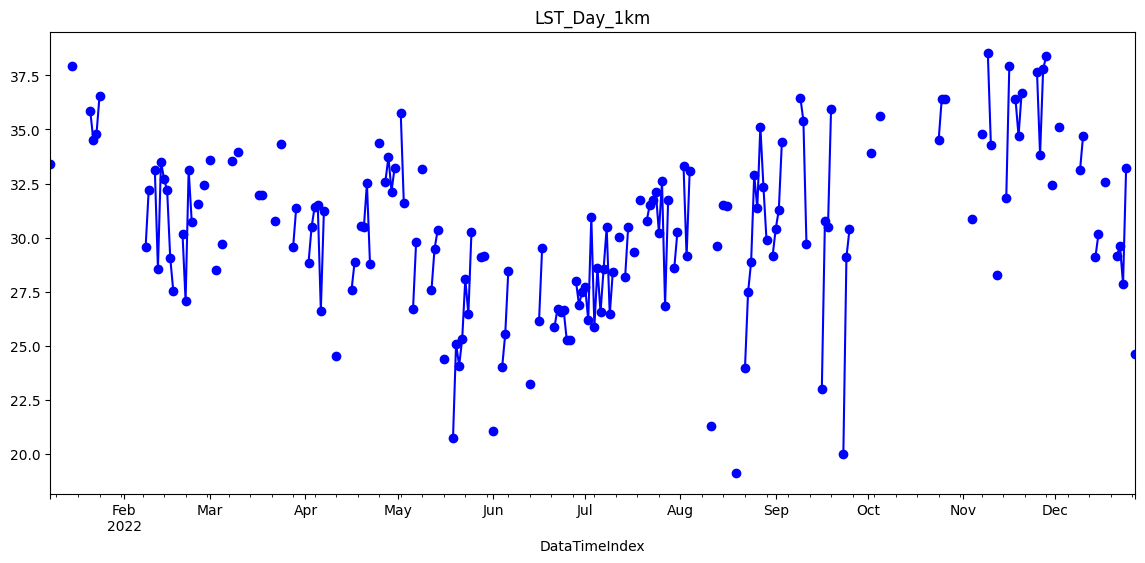

In [28]:
#Visualizando as informações em um grafico
sample_data = res_data.copy()
sample_data['LST_Day_1km'].plot(title = 'LST_Day_1km', marker = 'o', color = 'blue', figsize= ( 14,6))
plt.xlabel('DataTimeIndex')
plt.show()

## Deletion

Essa estrategia envolve eliminar qualqquer valor faltante. Enquanto seja simples para performar , se o valor faltante nao nao for um MCAR, essa abordagem pode resultar em um valor de perda da variavel infromação


In [29]:
sample_data.dropna()

,LST_Day_1km
datetime,
2022-01-08,33.39
2022-01-15,37.93
2022-01-21,35.83
2022-01-22,34.49
2022-01-23,34.77
...,...
2022-12-21,29.15
2022-12-22,29.61
2022-12-23,27.87


## Constant imputation

This techinique replaces all missing values with constant. Unless there is a compelling reason to select a specific constant, this method is generally not recommended.


In [30]:
sample_data.fillna(9)

,LST_Day_1km
datetime,
2022-01-08,33.39
2022-01-09,9.00
2022-01-10,9.00
2022-01-11,9.00
2022-01-12,9.00
...,...
2022-12-23,27.87
2022-12-24,33.23
2022-12-25,9.00


## Last Observation Carried Forward(LOCF) and next Observation Carrier backward(NOCB)

These methods replace missing values ​​with the immediately preceding observed value (LOCF) or the subsequent observed value (NOCB). They are potentially useful for time series data, but may introduce bias if the data are non-stationary.

In [31]:
ffill_data = sample_data.ffill()
ffill_data

,LST_Day_1km
datetime,
2022-01-08,33.39
2022-01-09,33.39
2022-01-10,33.39
2022-01-11,33.39
2022-01-12,33.39
...,...
2022-12-23,27.87
2022-12-24,33.23
2022-12-25,33.23


Text(0.5, 0, 'DateTimeIndex')

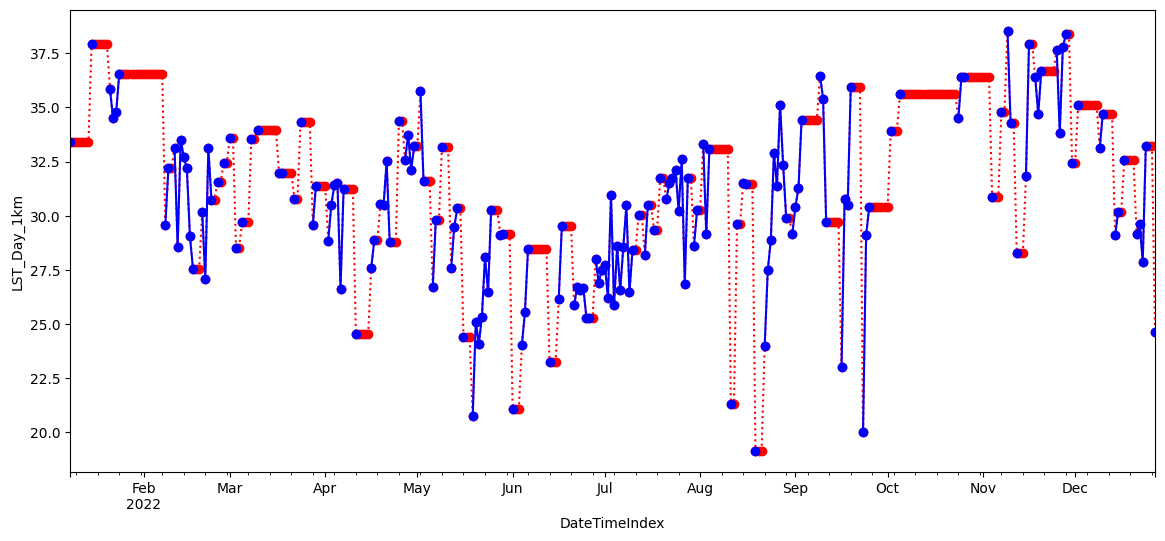

In [32]:
ffill_data['LST_Day_1km'].plot(color='red', marker='o', linestyle='dotted', figsize=(14, 6))

sample_data['LST_Day_1km'].plot(ylabel='LST_Day_1km', marker='o', color='blue', figsize=(14, 6))
plt.xlabel('DateTimeIndex')

## Imputation of continuous statistics

This method replaces missing values ​​with a continuous statistic (such as mean, median, or mode) over a specified window period. Commonly used on time series data, it assumes that data points closer in time are more similar. While this method can handle non-random confounding and preserve temporal dependence, the choice of window size and statistic can significantly affect the results, making it crucial to select these parameters carefully. This method may not be effective for data with large gaps in missing values.

In [33]:
rolling_mean_data = sample_data.fillna(sample_data.rolling(7, min_periods=1).mean())
rolling_mean_data

,LST_Day_1km
datetime,
2022-01-08,33.390
2022-01-09,33.390
2022-01-10,33.390
2022-01-11,33.390
2022-01-12,33.390
...,...
2022-12-23,27.870
2022-12-24,33.230
2022-12-25,29.965


Text(0.5, 0, 'DateTimeIndex')

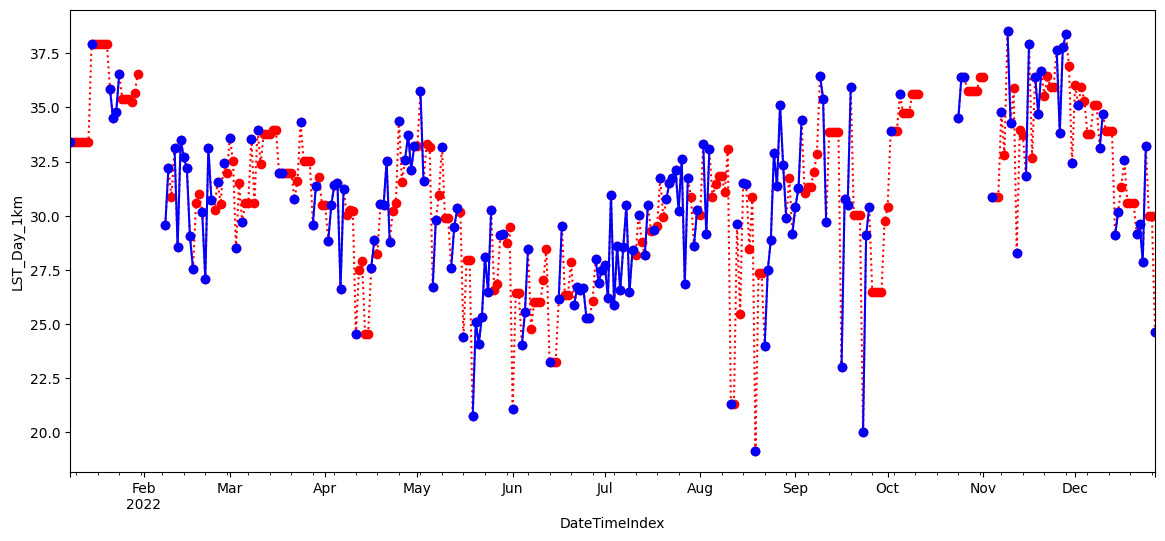

In [34]:
rolling_mean_data['LST_Day_1km'].plot(color = 'red', marker = 'o', linestyle = 'dotted', figsize = (14, 6))
sample_data['LST_Day_1km'].plot(ylabel = 'LST_Day_1km', marker = 'o', color = 'blue', figsize = (14, 6))
plt.xlabel('DateTimeIndex')

## Nearest Neighboor

Nearest interpolation is amthod that esitmates missing values by taking the value of the nearest negjboring data point. This approach can be valuble when data exbit abrupt changes or irregular intervals. This method preserves the orignial values and datails of the data, but it also create sharp discontinuities, which can affect the accuracy and quality of interpolated curve.

Generaly, KNN is a versatile algorithm used for supervised ML tasks. An effective approach to data imputation is to use a model to predicting missing values. Specifically, a new sample is imputed by finding the samples in the training set that are 'closest' to it and averagint these nearby points to fill in the value. However, KNN imputation also has some limitations, such as being sensitive to outliers, noise ,and scale, require a large and/or representative sample size.



Text(0.5, 0, 'DateTimeIndex')

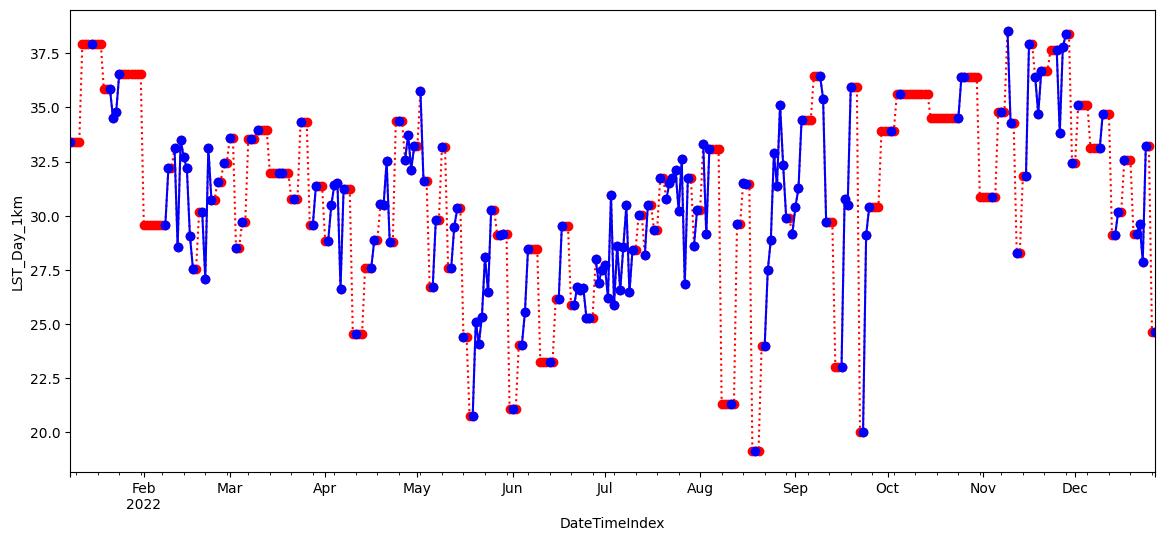

In [35]:
nearest_data = sample_data.interpolate(method = 'nearest')
nearest_data['LST_Day_1km'].plot(color='red', marker='o', linestyle='dotted', figsize=(14, 6))

sample_data['LST_Day_1km'].plot(ylabel='LST_Day_1km', marker='o', color='blue', figsize=(14, 6))
plt.xlabel('DateTimeIndex')

## Time series interpolation

Interpolation is a technique commonly used in time series analysis to estimat missing values between two know data points. Tie series data often contains gaps, either due to missing data or irregular sampling intervals. Interpolation helps fill these gaps by estimating the value of a missing data pint based on the values of adjacent data points.

there are several interpolation methods thaht can be used in time series analysis, including linar interpolation, polynomial interpolation and spline interpolation.

Interpolation can be a useful tool for analyzing time series data because it allows for the creation of a complete, continous time series. However, it is important to exercicise caution when using interpolation becuase it can introduce erros if the undelying assumptions of the interpolation method are not met. It is also essential to consider the potential impact of missing data on the analysis and interpretation of results.

In summary, interpolation is avluble techinique for fillng in missing values in time series data. However, it is importat to use appropriete methods and consider the potential

### Linear Interpolation

Linear interpolation is the most straightforward and commonly used interpolation method. It comes naturally to us when we have two points, we connect them with a straight line to fill in the missing information between them. In doing so, we have made our assumption that the points on the line represent the unobserved values. When there are more than two points, we simply connect any pair of adjacent points with straight lines. This is piecewise interpolation in the sense that in each subinterval formed by two adjacent points, we use a different line segment to represent the missing values. It is possible for all the points to lie on the same line, but we still go through the procedure of connecting each individual pair of points.

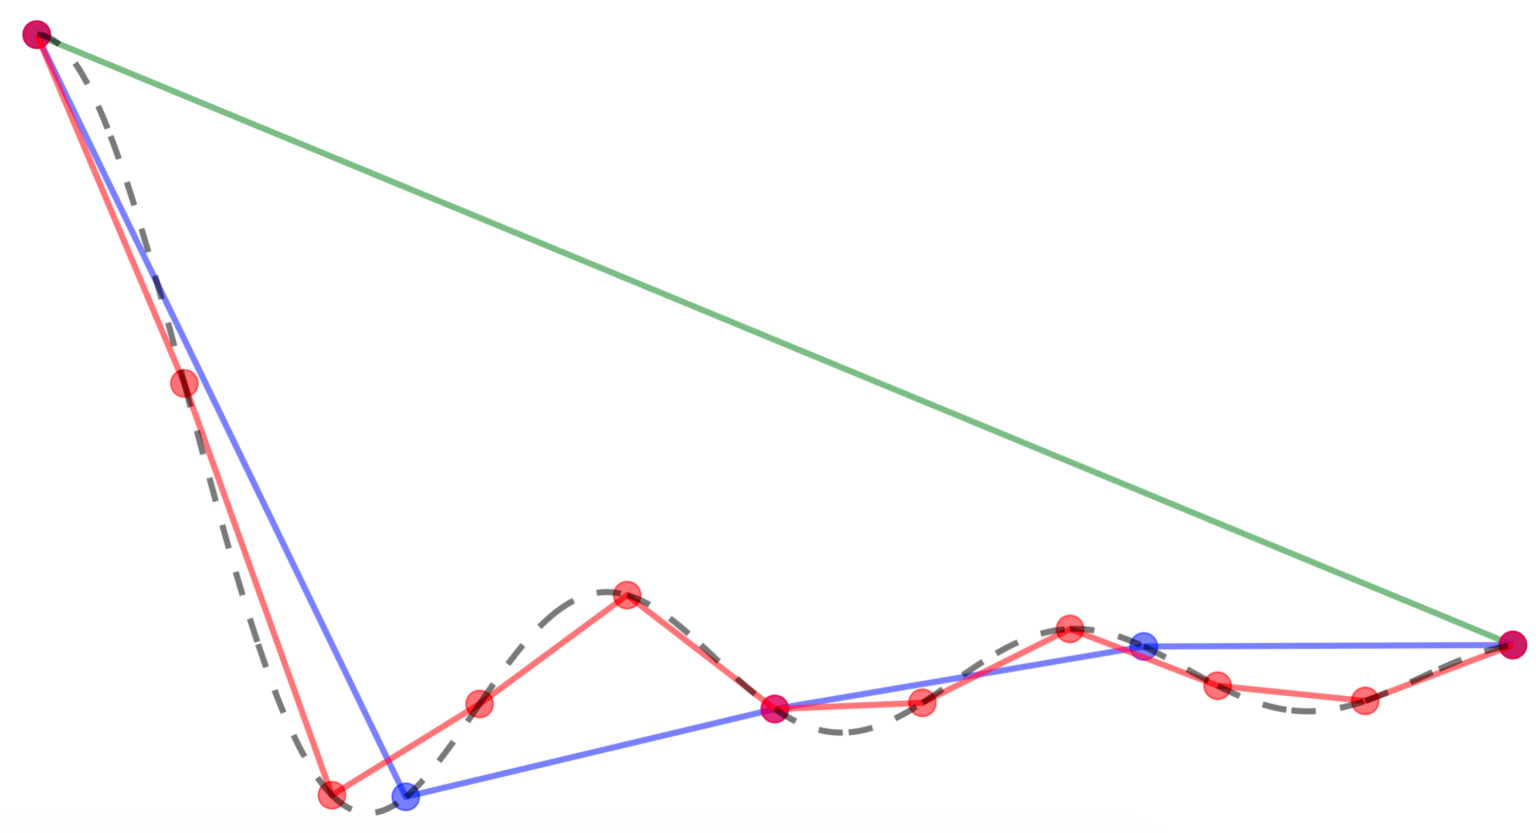

Linear interpolation works best when we have a lot of points. When there are more points, a drastic change in the values ​​of two adjacent points is less likely. Some discrepancies between any two adjacent points are small and can therefore be ignored. This is also why linear interpolation is the default method for visualizing discrete data points.

When we have fewer points, the search for greater accuracy prevails. And the errors between the interpolated values ​​and their true values ​​have a greater impact on the analysis. Thus, more interpolation methods are created to meet such demands.

Text(0.5, 0, 'DateTimeIndex')

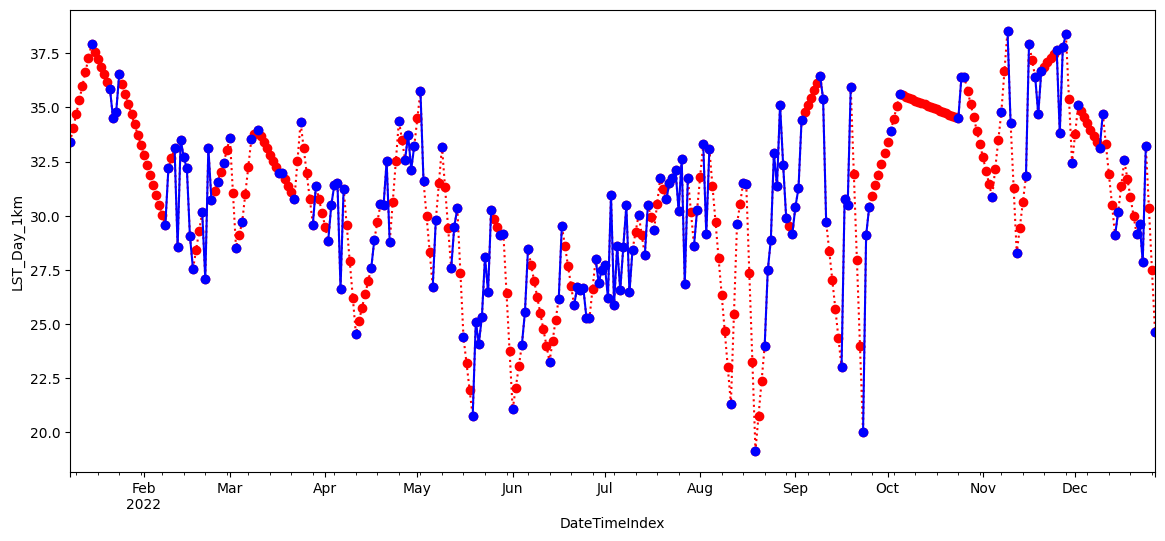

In [36]:
linear_data = sample_data.interpolate(method='linear').copy()
linear_data['LST_Day_1km'].plot(color='red', marker='o', linestyle='dotted', figsize=(14, 6))

sample_data['LST_Day_1km'].plot(ylabel='LST_Day_1km', marker='o', color='blue', figsize=(14, 6))
plt.xlabel('DateTimeIndex')

### Polinomial interpolation

Polynomial interpolation assumes that the points are samples taken from a polynomial curve. We know that a straight line can be described by a linear function, which is a special case of a polynomial of degree 1, and that a parabola can be described by a quadratic function, which is a polynomial of degree 2. We also know that any two points determine a line. Meanwhile, we can describe three or more points by a linear function if all of these points lie on the same line. Therefore, N points can be described by a polynomial of at most N-1 degrees. Consequently, there must exist a polynomial with the smallest number of degrees that describes all the points. Such a polynomial, given the observed points, is called the Lagrange polynomial.

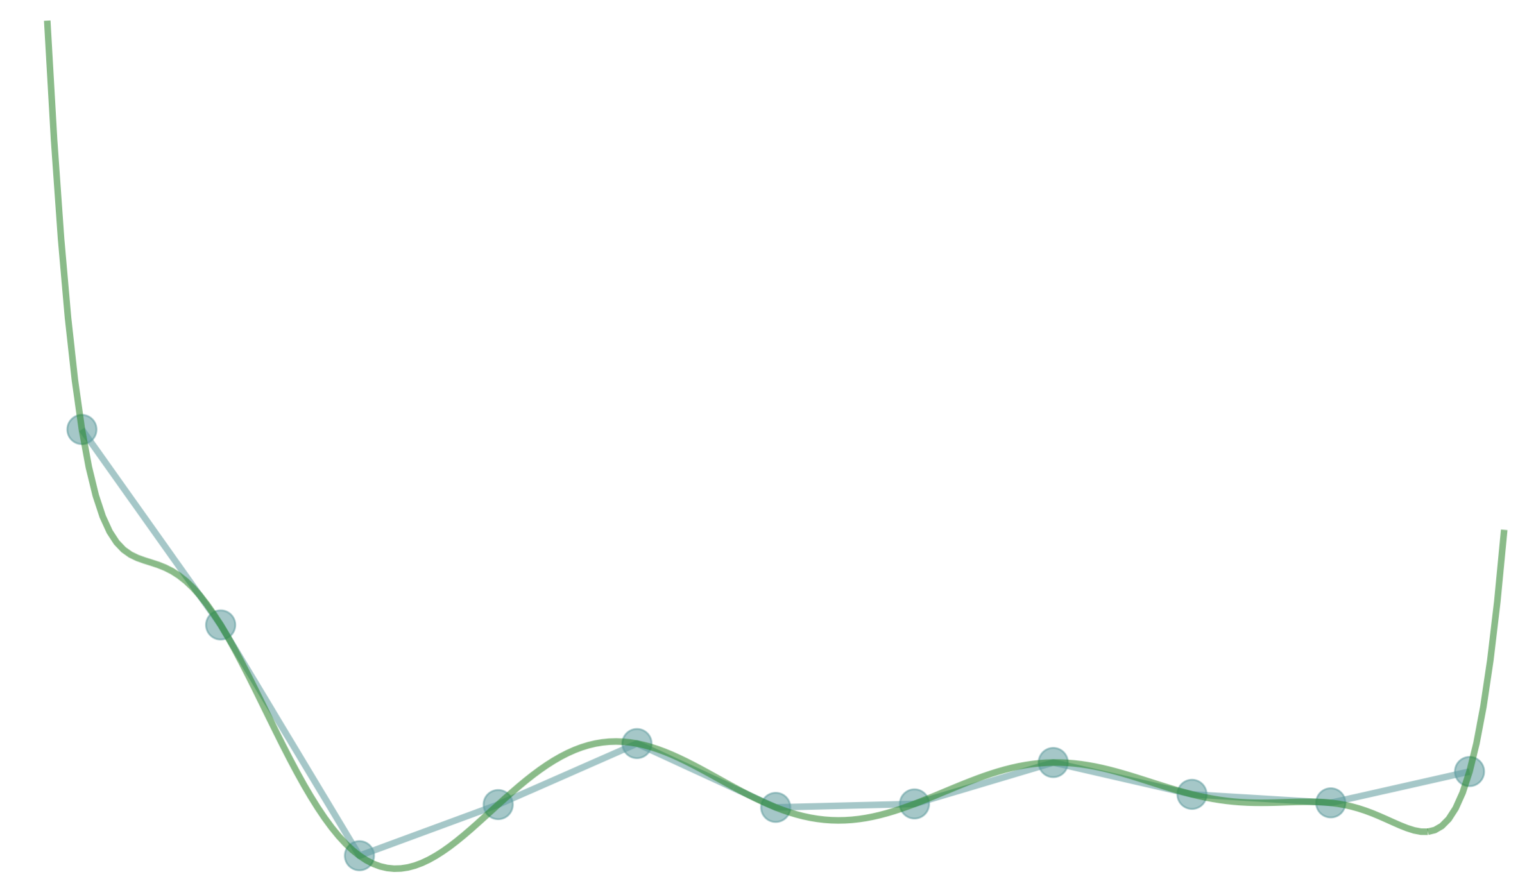

Text(0.5, 0, 'DateTimeIndex')

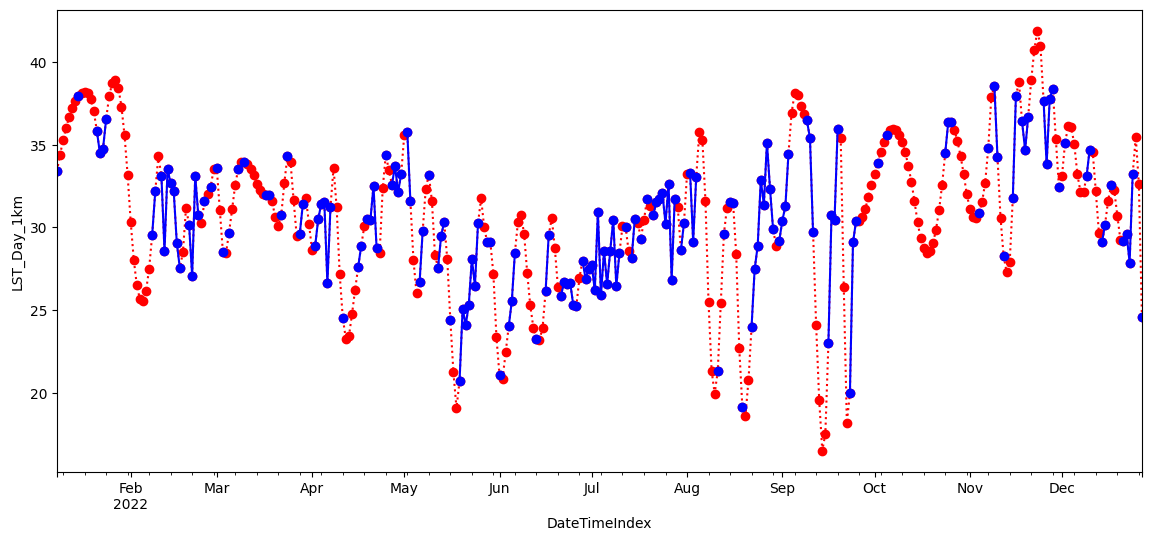

In [37]:
quadratic_data = sample_data.interpolate(method='quadratic').copy()
quadratic_data['LST_Day_1km'].plot(color='red', marker='o', linestyle='dotted', figsize=(14, 6))

sample_data['LST_Day_1km'].plot(ylabel='LST_Day_1km', marker='o', color='blue', figsize=(14, 6))
plt.xlabel('DateTimeIndex')

### Spline Interpolation

In this method, missing values ​​are replaced based on a spline interpolation of the available values. Spline interpolation employs piecewise polynomials to approximate the data, capturing nonlinear patterns. This method is suitable for time series data, but assumes some smoothness in the data.

Spline interpolation is a method in which data is fitted using splines, which are piecewise polynomial functions, with the goal of creating a smooth curve that passes through all of the given data points. In other words, instead of using a single polynomial to interpolate all of the points, as in polynomial interpolation, spline interpolation uses different low-degree polynomials for each interval between the points, joining them smoothly at the data points. This allows the curve to be more flexible and better capture the variations in the data, avoiding unwanted oscillations.


- Data division: The data range is divided into subranges, with known data points serving as nodes.
- Spline fitting: A spline, which is a low-degree polynomial, usually cubic, is fitted to each subrange.
- Smoothness conditions: Smoothness conditions are imposed on the nodes to ensure that the spline curve is continuous and smooth across the data range. These conditions usually involve matching the derivatives of the splines at the nodes.
- Interpolation: Once the splines are fitted and the smoothness conditions are applied, the resulting spline curve can be used to interpolate values ​​at any point within the data range.


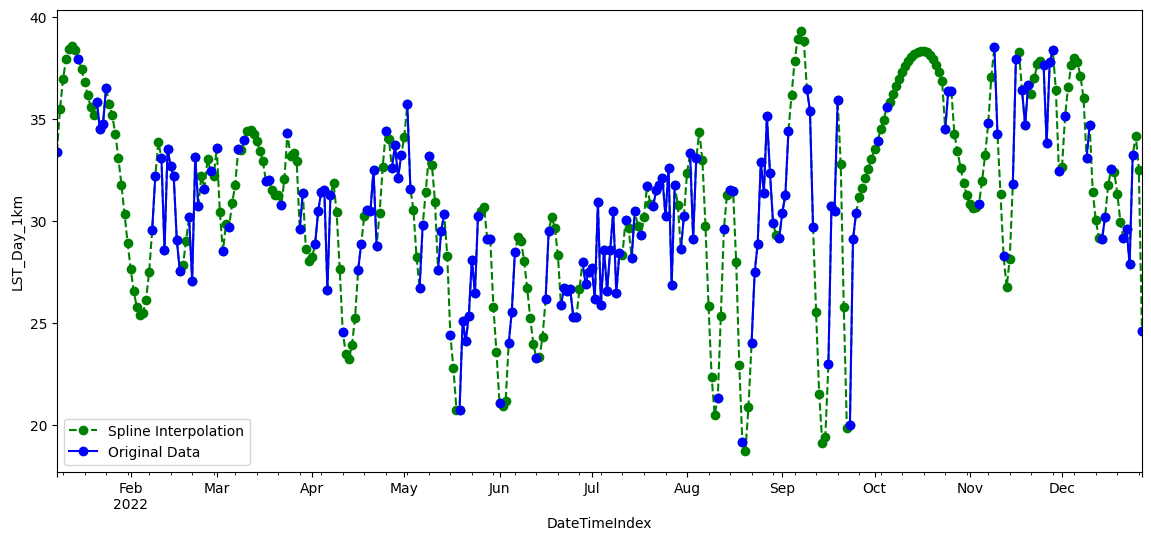

In [38]:
spline_data = sample_data.interpolate(method='spline', order=3).copy()
spline_data['LST_Day_1km'].plot(color='green', marker='o', linestyle='dashed', figsize=(14, 6))

sample_data['LST_Day_1km'].plot(ylabel='LST_Day_1km', marker='o', color='blue', figsize=(14, 6))
plt.xlabel('DateTimeIndex')
plt.legend(['Spline Interpolation', 'Original Data'])
plt.show()

### Seasonal Trend Decomposition Using Loess Imputation (STL)

Seasonal Trend Decomposition Using Loess (STL) is a statistical method for decomposing a time series into three components: trend, seasonal, and remainder (random). It can be used to impute missing data in a time series. In the STL imputation method, missing values ​​are first estimated using interpolation to allow for STL decomposition. Then, the seasonal and trend components of the decomposed time series are extracted. The missing values ​​are then re-estimated by interpolating the trend component and re-adding the seasonal component.

STL imputation can be used when dealing with time series data that exhibit a seasonal pattern. It is particularly useful when the data is missing at random and the missingness is unrelated to the trend or seasonality of the time series.


In [39]:
from statsmodels.tsa.seasonal import STL
stl_data = sample_data.copy()
#Filtrando os valores faltantes numa serie temporal
imputed_indices = stl_data[stl_data['LST_Day_1km'].isnull()].index


In [40]:
#Extract seasonal and trend components
stl = STL(sample_data['LST_Day_1km'].interpolate(), seasonal = 31)
res = stl.fit()

<Axes: xlabel='datetime'>

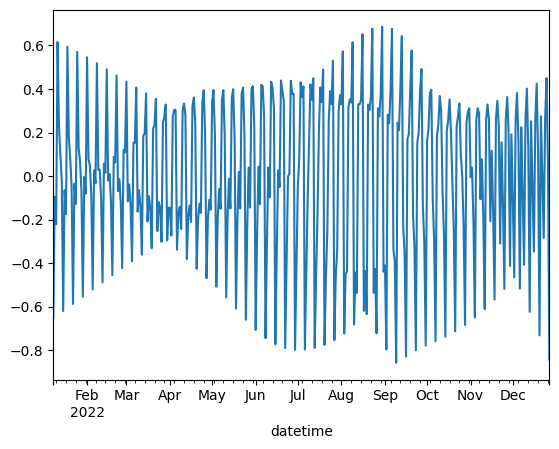

In [41]:
seasonal_component = res.seasonal
seasonal_component.plot()

In [42]:
#Create the seasonally adjusted series
df_deseasonalized = stl_data['LST_Day_1km'] - seasonal_component
#Interpolate missing values in the seasonally adjusted series
df_deseasonalized_imputed = df_deseasonalized.interpolate(method = 'linear')
#add the sazonal component back in to create the final imputed series
df_imputed = df_deseasonalized_imputed + seasonal_component


In [43]:
#Update the orignal df with the imputed values
stl_data.loc[imputed_indices, 'LST_Day_1km'] = df_imputed[imputed_indices]

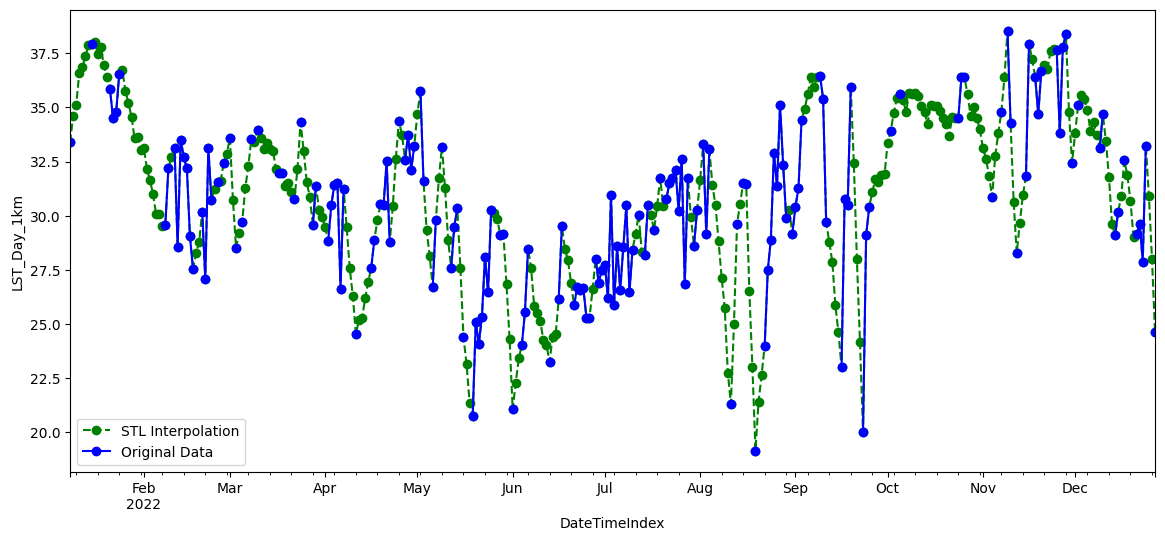

In [44]:
stl_data['LST_Day_1km'].plot(color='green', marker='o', linestyle='dashed', figsize=(14, 6))

sample_data['LST_Day_1km'].plot(ylabel='LST_Day_1km', marker='o', color='blue', figsize=(14, 6))
plt.xlabel('DateTimeIndex')
plt.legend(['STL Interpolation', 'Original Data'])
plt.show()